# Traitement et Analyse Approfondis des Données pour la Prédiction de Maladie Cardiaque


Ce notebook a pour objectif de fournir une analyse complète et approfondie des données afin de préparer un modèle de prédiction efficace. Nous allons explorer les étapes clés pour nettoyer, analyser et transformer les données.


In [83]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Charger les données
df = pd.read_csv('HeartDiseaseUCI.csv')
df.head()


,Unnamed: 0,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,1,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,2,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
2,3,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,4,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,5,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0


## 1. Exploration Initiale des Données

In [84]:

# Résumé statistique des données
df.describe()


,Unnamed: 0,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,299.000000,301.000000,303.000000
mean,152.000000,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.672241,4.734219,0.937294
std,87.612784,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.937438,1.939706,1.228536
min,1.000000,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,76.500000,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,152.000000,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,227.500000,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,2.000000
max,303.000000,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,4.000000


In [85]:

# Types de données et valeurs manquantes
df.info()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  303 non-null    int64  
 1   age         303 non-null    int64  
 2   sex         303 non-null    int64  
 3   cp          303 non-null    int64  
 4   trestbps    303 non-null    int64  
 5   chol        303 non-null    int64  
 6   fbs         303 non-null    int64  
 7   restecg     303 non-null    int64  
 8   thalach     303 non-null    int64  
 9   exang       303 non-null    int64  
 10  oldpeak     303 non-null    float64
 11  slope       303 non-null    int64  
 12  ca          299 non-null    float64
 13  thal        301 non-null    float64
 14  num         303 non-null    int64  
dtypes: float64(3), int64(12)
memory usage: 35.6 KB


Unnamed: 0    0
age           0
sex           0
cp            0
trestbps      0
chol          0
fbs           0
restecg       0
thalach       0
exang         0
oldpeak       0
slope         0
ca            4
thal          2
num           0
dtype: int64

## 2. Traitement des Valeurs Manquantes

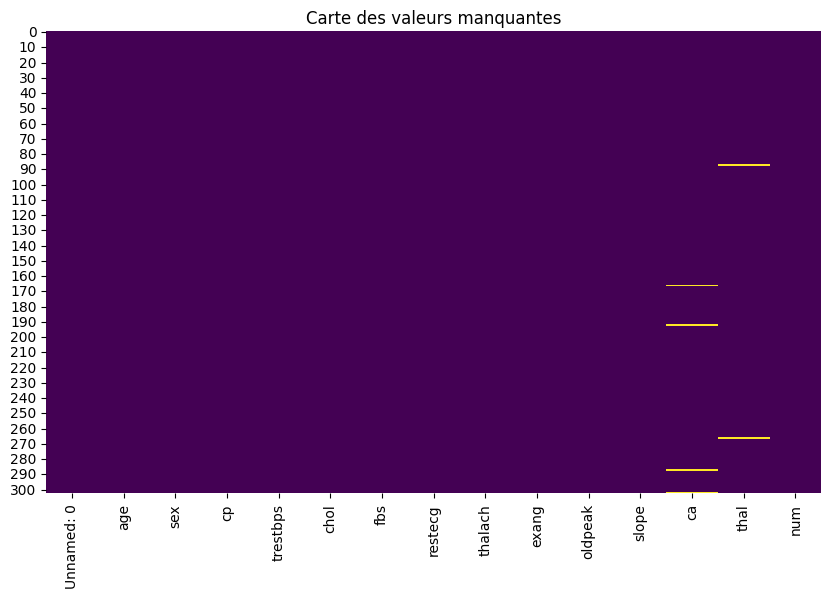

C:\Users\hergi\AppData\Local\Temp\ipykernel_30448\1715994795.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(df[column].median(), inplace=True)
C:\Users\hergi\AppData\Local\Temp\ipykernel_30448\1715994795.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

F

Unnamed: 0    0
age           0
sex           0
cp            0
trestbps      0
chol          0
fbs           0
restecg       0
thalach       0
exang         0
oldpeak       0
slope         0
ca            0
thal          0
num           0
dtype: int64

In [86]:

# Visualisation des valeurs manquantes
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Carte des valeurs manquantes")
plt.show()

# Imputation ou suppression des valeurs manquantes (exemple d'imputation par la médiane)
for column in df.columns:
    if df[column].isnull().sum() > 0:
        df[column].fillna(df[column].median(), inplace=True)
df.isnull().sum()  # Vérifier l'absence de valeurs manquantes


In [87]:
df.head(4)

,Unnamed: 0,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,1,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,2,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
2,3,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,4,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0


## 3. Analyse des Distributions des Caractéristiques

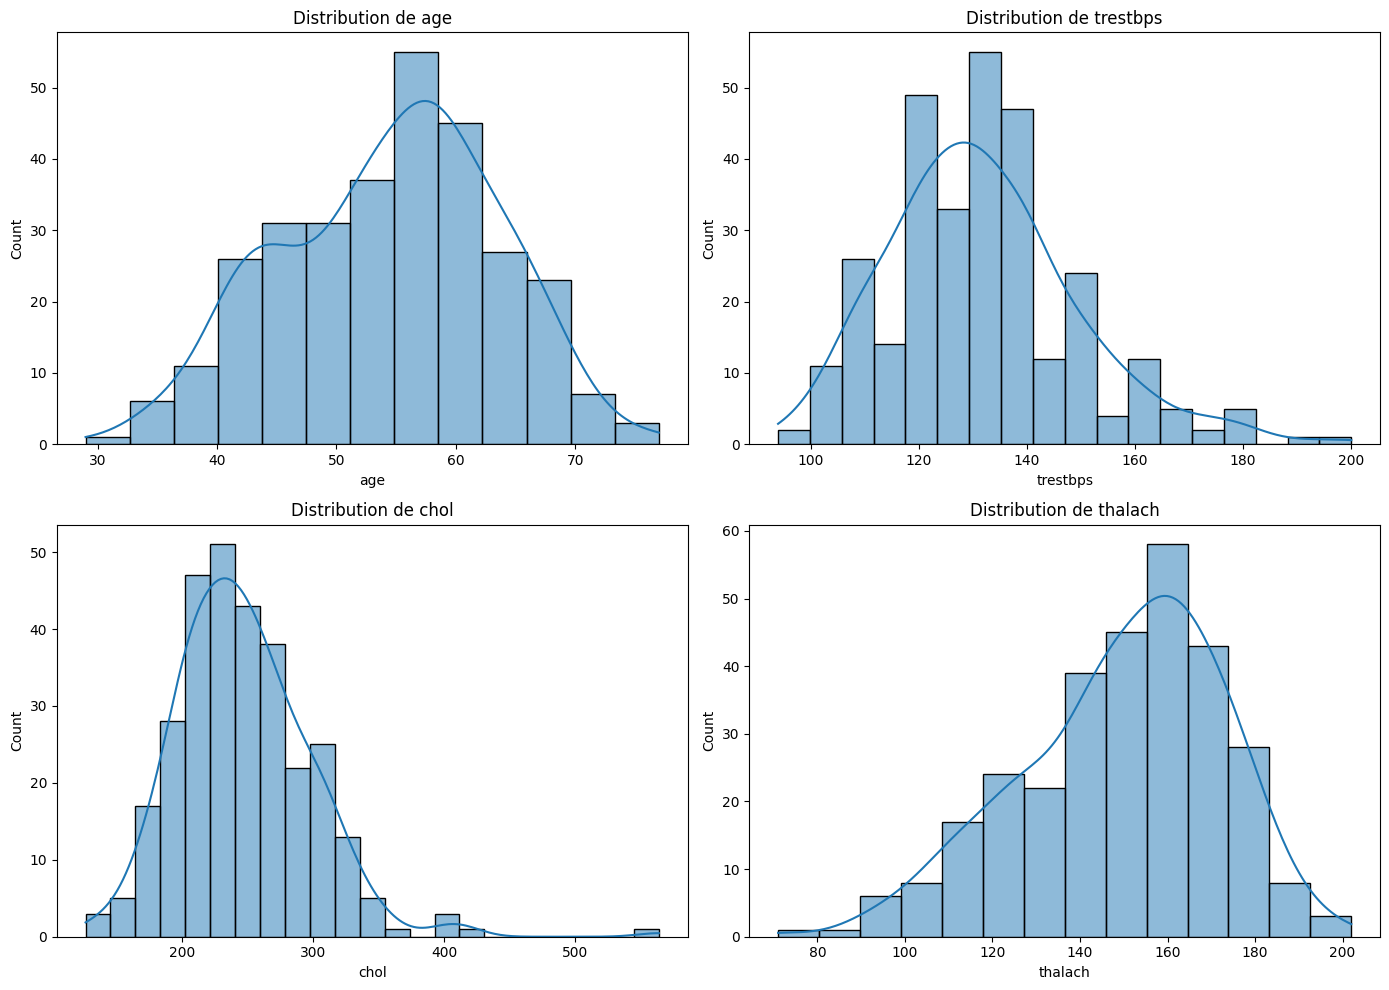

In [88]:

# Distribution des caractéristiques continues
plt.figure(figsize=(14, 10))
for i, col in enumerate(['age', 'trestbps', 'chol', 'thalach'], 1):
    plt.subplot(2, 2, i)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution de {col}')
plt.tight_layout()
plt.show()


## 4. Analyse des Corrélations

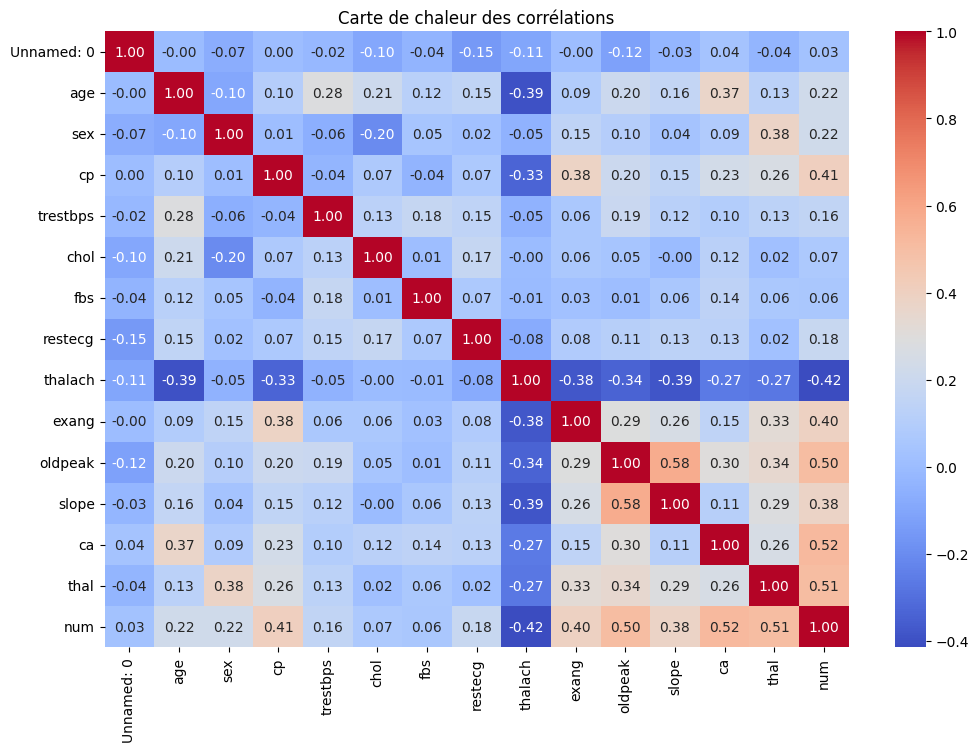

num           1.000000
ca            0.520968
thal          0.507155
oldpeak       0.504092
cp            0.407075
exang         0.397057
slope         0.377957
sex           0.224469
age           0.222853
restecg       0.183696
trestbps      0.157754
chol          0.070909
fbs           0.059186
Unnamed: 0    0.029256
thalach      -0.415040
Name: num, dtype: float64

In [89]:

# Carte de chaleur des corrélations pour voir les relations entre caractéristiques
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Carte de chaleur des corrélations")
plt.show()

# Identifier les caractéristiques corrélées avec la variable cible 'num'
df.corr()['num'].sort_values(ascending=False)


## 5. Comparaison entre Patients Malades et Non-Malades

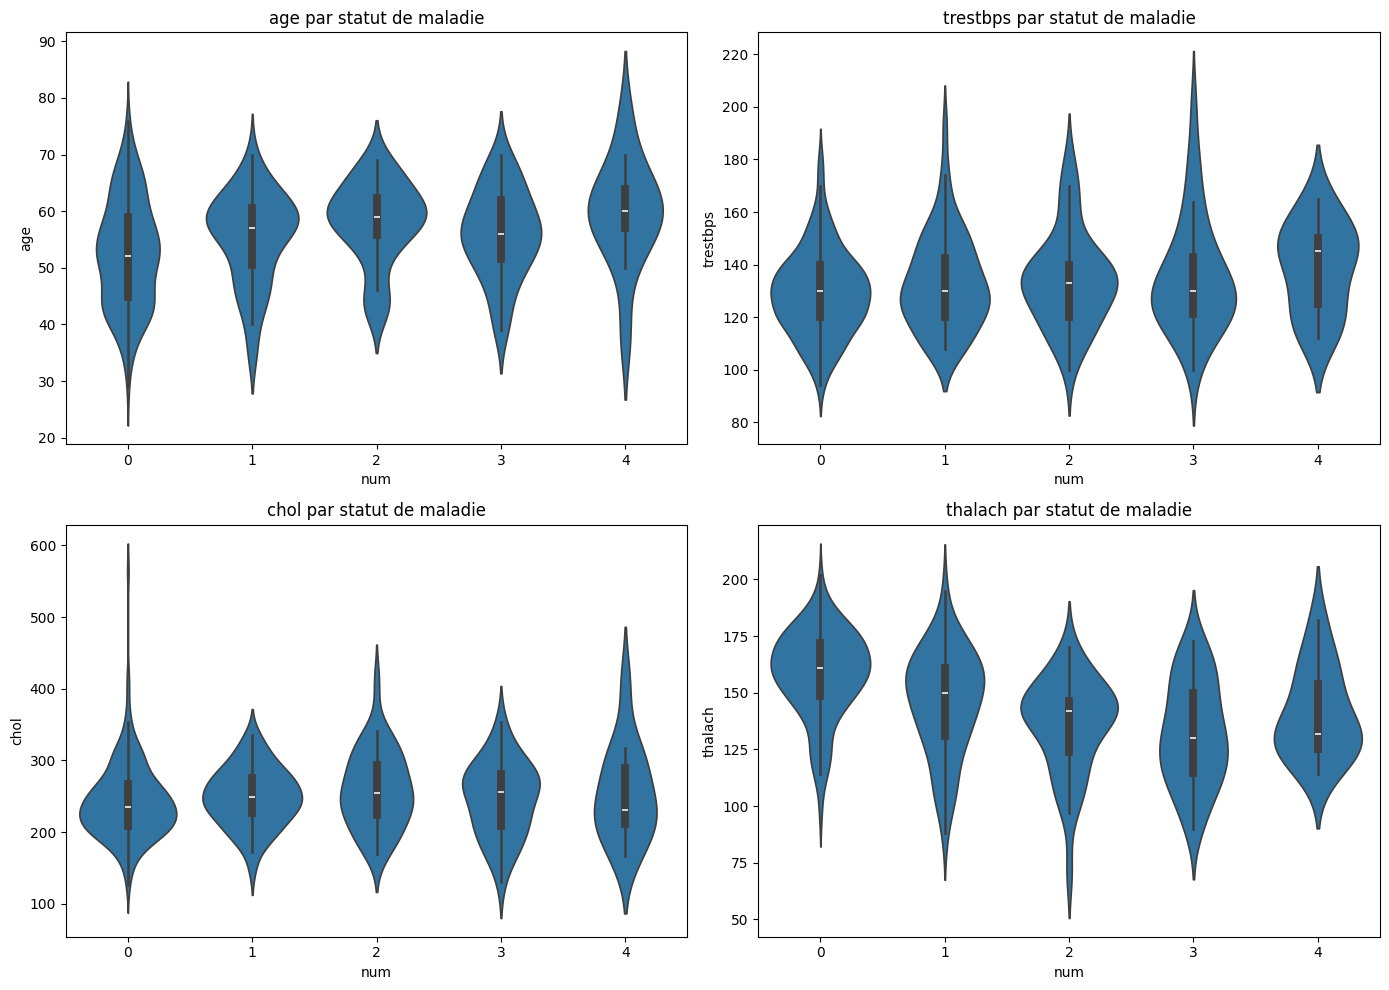

In [90]:

# Comparaison entre malade et non malade pour certaines caractéristiques
plt.figure(figsize=(14, 10))
for i, col in enumerate(['age', 'trestbps', 'chol', 'thalach'], 1):
    plt.subplot(2, 2, i)
    sns.violinplot(x='num', y=col, data=df)
    plt.title(f'{col} par statut de maladie')
plt.tight_layout()
plt.show()


## 6. Détection et Traitement des Outliers

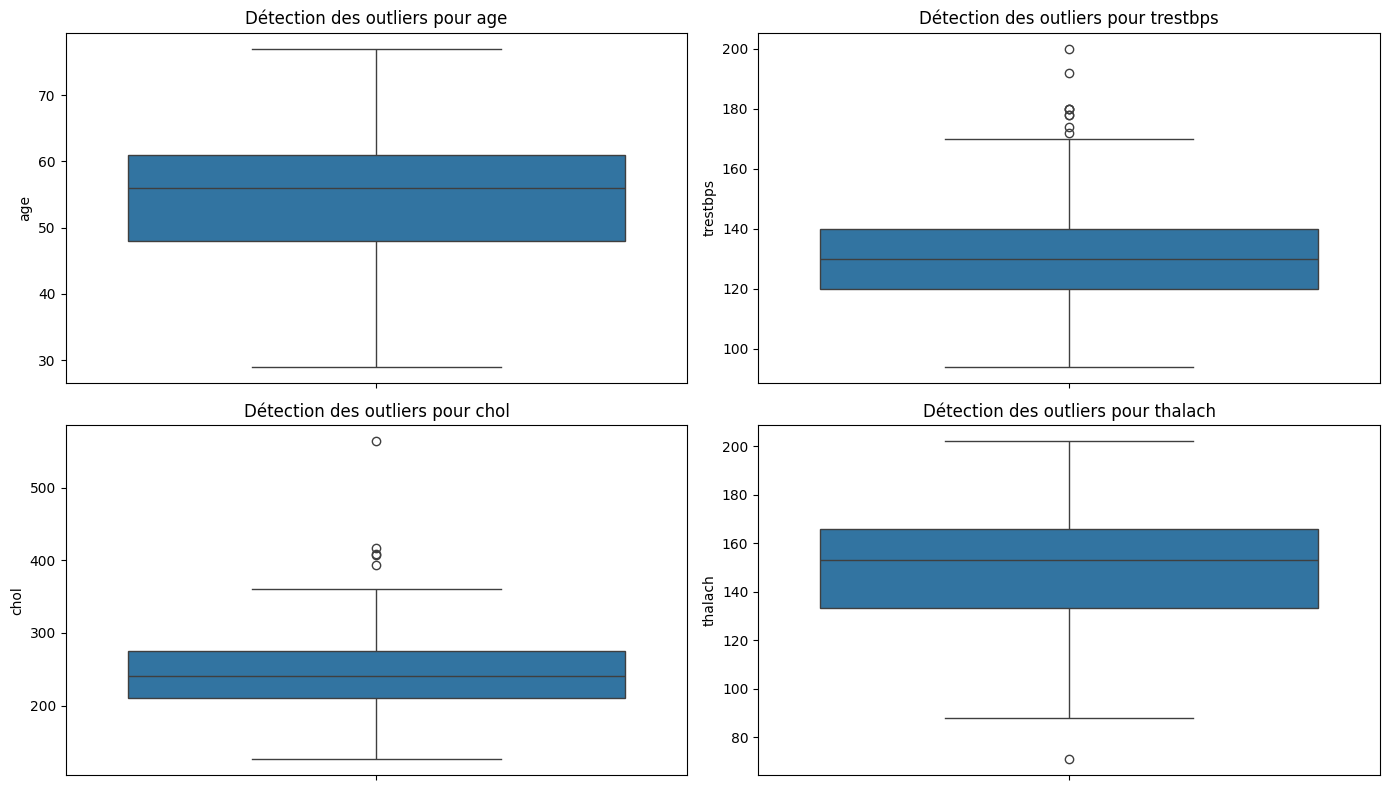

In [91]:

# Détection des outliers avec des box plots
plt.figure(figsize=(14, 8))
for i, col in enumerate(['age', 'trestbps', 'chol', 'thalach'], 1):
    plt.subplot(2, 2, i)
    sns.boxplot(data=df, y=col)
    plt.title(f'Détection des outliers pour {col}')
plt.tight_layout()
plt.show()

# Exemple de traitement des outliers : limitation des valeurs extrêmes (Winsorizing)
for col in ['age', 'trestbps', 'chol', 'thalach']:
    q1 = df[col].quantile(0.01)
    q99 = df[col].quantile(0.99)
    df[col] = np.clip(df[col], q1, q99)


## 7. Transformation des Données

In [92]:

# Normalisation des caractéristiques continues
from sklearn.preprocessing import StandardScaler

continous_features = ['age', 'trestbps', 'chol', 'thalach']
scaler = StandardScaler()
df[continous_features] = scaler.fit_transform(df[continous_features])
df.head()


,Unnamed: 0,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,1,0.968405,1,1,0.780148,-0.272744,1,2,0.014451,0,2.3,3,0.0,6.0,0
1,2,1.419830,1,4,1.655000,0.814655,0,2,-1.860533,1,1.5,2,3.0,3.0,2
2,3,1.419830,1,4,-0.677938,-0.354812,0,2,-0.923041,1,2.6,2,2.0,7.0,1
3,4,-1.965862,1,3,-0.094703,0.076044,0,0,1.666221,0,3.5,3,0.0,3.0,0
4,5,-1.514436,0,2,-0.094703,-0.867736,0,2,0.996585,0,1.4,1,0.0,3.0,0


## 8. Création et Sélection des Caractéristiques

In [93]:
df.head(5)

,Unnamed: 0,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,1,0.968405,1,1,0.780148,-0.272744,1,2,0.014451,0,2.3,3,0.0,6.0,0
1,2,1.419830,1,4,1.655000,0.814655,0,2,-1.860533,1,1.5,2,3.0,3.0,2
2,3,1.419830,1,4,-0.677938,-0.354812,0,2,-0.923041,1,2.6,2,2.0,7.0,1
3,4,-1.965862,1,3,-0.094703,0.076044,0,0,1.666221,0,3.5,3,0.0,3.0,0
4,5,-1.514436,0,2,-0.094703,-0.867736,0,2,0.996585,0,1.4,1,0.0,3.0,0


In [94]:
df.head(4)

,Unnamed: 0,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,1,0.968405,1,1,0.780148,-0.272744,1,2,0.014451,0,2.3,3,0.0,6.0,0
1,2,1.419830,1,4,1.655000,0.814655,0,2,-1.860533,1,1.5,2,3.0,3.0,2
2,3,1.419830,1,4,-0.677938,-0.354812,0,2,-0.923041,1,2.6,2,2.0,7.0,1
3,4,-1.965862,1,3,-0.094703,0.076044,0,0,1.666221,0,3.5,3,0.0,3.0,0


In [95]:
# Si la colonne contient déjà des nombres mais avec des valeurs supérieures à 1 pour les malades, on peut aussi faire ceci :
df['num'] = df['num'].apply(lambda x: 1 if x != 0 else 0)

In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  303 non-null    int64  
 1   age         303 non-null    float64
 2   sex         303 non-null    int64  
 3   cp          303 non-null    int64  
 4   trestbps    303 non-null    float64
 5   chol        303 non-null    float64
 6   fbs         303 non-null    int64  
 7   restecg     303 non-null    int64  
 8   thalach     303 non-null    float64
 9   exang       303 non-null    int64  
 10  oldpeak     303 non-null    float64
 11  slope       303 non-null    int64  
 12  ca          303 non-null    float64
 13  thal        303 non-null    float64
 14  num         303 non-null    int64  
dtypes: float64(7), int64(8)
memory usage: 35.6 KB


In [100]:
# Suppression d'une colonne (par exemple, 'colonne_a_supprimer')
df = df.drop(columns=['Unnamed: 0'])

In [101]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
298,-1.063010,1,1,-1.261172,0.363282,0,0,-0.789114,0,1.2,2,0.0,7.0,1
299,1.532687,1,4,0.721825,-1.093423,1,0,-0.387331,0,3.4,2,2.0,7.0,1
300,0.291266,1,4,-0.094703,-1.996170,0,0,-1.548035,1,1.2,2,1.0,7.0,1
301,0.291266,0,2,-0.094703,-0.211193,0,2,1.085870,0,0.0,2,1.0,3.0,1
302,-1.853005,1,3,0.371884,-1.462729,0,0,1.041227,0,0.0,1,0.0,3.0,0


In [98]:
df['num'].unique()

array([0, 1], dtype=int64)

In [102]:
df.to_csv('HeartDiseaseUCI1.csv', index=False)